---
# <span style="color:pink">DS3000B - DS9000B Midterm Exam</span>

## <span style="color:pink">Student ID #: _________</span>

## <span style="color:pink">Grade: __ / 100</span>

## <span style="color:pink">General Comments</span>

- This exam integrates knowledge and skills acquired in the first half of the term.

- Using AI agents/chatbots such as ChatGPT and Copilot is considered an act of cheating and you will receive 0 mark for the exam.

- You are allowed to use any other resources on your computer or the internet, but you are **not** allowed to share documents, post questions to forums such as Stack Overflow (this includes use of homework helpers such as Chegg), or communicate in anyway with people inside or outside the exam room.

- Having any communication tools (*e.g.*, Discord, Teams, Slack, Outlook etc.) either web-based or app-based open on your computer (or having them running in the background) is considered an act of cheating and you will receive 0 mark for the exam.

- To finish the midterm in the alloted time, you will have to work efficiently.

- Please read the entirety of each question carefully.

- You must have your work submitted by 6:30PM to the "Assignments" section of the course's site on OWL, *i.e.*, the same place where you originally downloaded the notebook. Late submissions will be scored with 0 mark unless one has an approved accommodation for submitting late.

- To avoid technical difficulties at the time of submission, please initiate your submission process at the latest five minutes before the deadline.

- Some questions demand a **written answer**. Please answer these in full English sentences in a markdown cell right underneath the question.

- For your figures ensure that all axes are labeled in an informative way.

- At the end, before submitting to OWL, restart the kernel and rerun all cells to make sure that your notebook runs error free and as expected.

## <span style="color:pink">Additional Guidance</span>

- If at any point you are asking yourself "are we supposed to...", write your assumptions clearly and proceed according to them.

- If you have no clue how to approach a question, skip it, and move on. Revisit the skipped one(s) after you are done with other questions.

- Where applicable, take advantage of the argument `n_jobs=-1` to speed up processes with parallel computing.

- To navigate within the notebook, better to take advantage of the notebook's table of contents (normally on the left side of the screen). It saves you some time compared to pure scrolling with the mouse. In VScode, it is nested under the "OUTLINE" tab which is by default minimized unless you click it to maximize.

- Please ensure that your results are generated using the provided random seed, where applicable.

---
## <span style="color:orange">Toolbox</span>

In [ ]:
from datetime import datetime
import numpy as np
seed = 240229
np.random.seed(seed)
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split
from sklearn.metrics import  auc, roc_curve, roc_auc_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

---
## Question 1 - <span style="color:red">[70]</span> - Classification
For this question you will be working with "Data_Q1.csv", which is a dataset on property price. Below, we provide a detailed description of each variable in the dataset:

|Column Index | Attribute | Description |
| --- | --- | --- |
| 0|ID|Property's identification number|
| 1|MSSubClass|Building class|
| 2|LotArea|Lot size in square feet|
| 3|LandSlope|Slope of property's land|
| 4|HouseStyle|Style of dwelling|
| 5|OverallQual|Overall material and finish quality|
| 6|OverallCond|Overall condition rating|
| 7|YearBuilt|Original construction date|
| 8|MasVnrArea|Masonry veneer walls area in square feet|
| 9|TotalBsmtSF|Total square feet of basement area|
|10|Heating|Type of heating|
|11|CentralAir|Central air conditioning|
|12|1stFlrSF|First Floor square feet|
|13|2ndFlrSF|Second floor square feet|
|14|GrLivArea|Above grade (ground) living area square feet|
|15|FullBath|Full bathrooms above grade|
|16|HalfBath|Half baths above grade|
|17|BedroomAbvGr|Number of bedrooms above basement level|
|18|TotRmsAbvGrd|Total rooms above grade (does not include bathrooms)|
|19|Fireplaces|Number of fireplaces|
|20|GarageCars|Size of garage in car capacity|
|21|GarageArea|Size of garage in square feet|
|22|PavedDrive|Paved driveway|
|23|WoodDeckSF|Wood deck area in square feet|
|24|OpenPorchSF|Open porch area in square feet|
|25|MiscVal|$ value of miscellaneous feature|
|26|YrSold|Year sold|
|27|SalePrice|Sale price in dollars|

### Q1.1 - <span style="color:red">[20]</span> - Data preparation
Load the dataset as a pandas dataframe and perform the following steps:
1. Display its first five rows. <span style="color:green">[2]</span>
2. Print out the number of rows and columns of it? <span style="color:green">[2]</span>
3. Print out the count for each variable type? For example, if you have a dataframe with 5 columns of which 2 are `int64` and 3 are `float64`, your printed output will be like: `float64` 3, `int64` 2. <span style="color:green">[2]</span>
4. Print out the count of rows with missing values. Drop those rows from the dataframe, if any. <span style="color:green">[2]</span>
5. Remove the `Id` column from your dataframe. <span style="color:green">[2]</span>
6. Find the age of the properties using `YearBuilt` variable and replace `YearBuilt` with the new variable `PropertyAge`. For this purpose, use the current year as reference. <span style="color:green">[2]</span>
7. Use `YrSold` variable to calculate how many years ago the property was sold and name that new coulmn `YrsSinceSale` and replace `YrSold`. <span style="color:green">[2]</span>
8. Encode all categorical columns using One-hot encoding. We want to get $k-1$ dummies out of $k$ categorical levels. How many new columns were added to the dataframe? <span style="color:green">[2]</span>
9. Eventually, we want to a do binary classification of properties based on their `SalePrice`. In order to prepare the data for that stage, here we want to bin `SalePrice` based on its median value, *i.e.*, if a property's `SalePrice` is above or equal to the median value of the vector `SalePrice`, the property's `SalePrice` value gets replaced with 1, otherwise 0. <span style="color:green">[2]</span>
10. Report the count of ones and zeros in your updated `SalePrice` attribute. Taking it as the target for classification, will that be a balanced or imbalanced classification problem? <span style="color:green">[2]</span>

In [ ]:
df1 = pd.read_csv('Data_Q1.csv')

# Q1.1
print("Q1.1 - Dataframe 1st five rows:")
display(df1.head())

# Q1.2
print(f"\nQ1.2 - Dataframe dimension: {df1.shape[0]} rows by {df1.shape[1]} columns")

# Q1.3
print(f"\nQ1.3 - Count of variable types:\n{df1.dtypes.value_counts()}")

# Q1.4
print(f"\nQ1.4 - Count of rows with missing values: {df1.isna().sum().sum()}") # or df1.isnull().any().sum()
df1.dropna(inplace=True)

# Q1.5
df1.drop('Id', axis=1, inplace=True)
print(f"\nQ1.5 - Column ID dropped.")

# Q1.6
df1['PropertyAge'] = datetime.now().year - df1['YearBuilt']
df1.drop('YearBuilt', axis=1, inplace=True)
print(f"\nQ1.6 - The attribute PropertyAge was added, and YearBuilt was dropped.")

# Q1.7
df1['YrsSinceSale'] = datetime.now().year - df1['YrSold']
df1.drop('YrSold', axis=1, inplace=True)
print(f"\nQ1.7 - The attribute YrsSinceSale was added, and YrSold was dropped.")

# Q1.8
prior_columns_count = df1.shape[1]
df1 = pd.get_dummies(df1, drop_first=True)
print(f"\nQ1.8 - {df1.shape[1]-prior_columns_count} new columns were added to the dataframe as a result of One-hot encoding.")

# Q1.9
median_sale_price = df1['SalePrice'].median()
df1['SalePrice'] = (df1['SalePrice'] >= median_sale_price).astype(int)
print("\nQ1.9 - Binning of the continuous values implemented.")

# Q1.10
print(f"\nQ1.10 - It will be a balanced case, because:\n{df1.SalePrice.value_counts()}")

Q1.1 - Dataframe 1st five rows:


,Id,MSSubClass,LotArea,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,Heating,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MiscVal,YrSold,SalePrice
0,1,60,8450,Gtl,2Story,7,5,2003,196.0,856,GasA,Y,856,854,1710,2,1,3,8,0,2,548,Y,0,61,0,2008,208500
1,2,20,9600,Gtl,1Story,6,8,1976,0.0,1262,GasA,Y,1262,0,1262,2,0,3,6,1,2,460,Y,298,0,0,2007,181500
2,3,60,11250,Gtl,2Story,7,5,2001,162.0,920,GasA,Y,920,866,1786,2,1,3,6,1,2,608,Y,0,42,0,2008,223500
3,4,70,9550,Gtl,2Story,7,5,1915,0.0,756,GasA,Y,961,756,1717,1,0,3,7,1,3,642,Y,0,35,0,2006,140000
4,5,60,14260,Gtl,2Story,8,5,2000,350.0,1145,GasA,Y,1145,1053,2198,2,1,4,9,1,3,836,Y,192,84,0,2008,250000



Q1.2 - Dataframe dimension: 1460 rows by 28 columns

Q1.3 - Count of variable types:
int64      22
object      5
float64     1
dtype: int64

Q1.4 - Count of rows with missing values: 8

Q1.5 - Column ID dropped.

Q1.6 - The attribute PropertyAge was added, and YearBuilt was dropped.

Q1.7 - The attribute YrsSinceSale was added, and YrSold was dropped.

Q1.8 - 12 new columns were added to the dataframe as a result of One-hot encoding.

Q1.9 - Binning of the continuous values implemented.

Q1.10 - It will be a balanced case, because:
1    726
0    726
Name: SalePrice, dtype: int64


### Q1.2 - <span style="color:red">[8]</span> - Data Splitting
In the previous question, you converted `SalePrice` to a discrete variable. Separate it from the rest of the attributes to use it as the target variable for your machine learning model. Split, in a stratified and shuffled fashion, your preprocessed dataset by setting aside 30 percent of the data for testing, and the rest for training. Make sure to use the provided random seed for this purpose. Then, print out class distribution for both ytrain and ytest.

In [ ]:
# 6 pts
X = df1.drop('SalePrice', axis=1)
y = df1["SalePrice"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                test_size =0.3,
                                                random_state=seed,
                                                shuffle=True, # "shuffle" by default is "True" though
                                                stratify=y)   # "stratify" by default is "None"
# 2 pts
print(f"ytrain class distribution:\n{ytrain.value_counts()}")
print(f"\nytest class distribution:\n{ytest.value_counts()}")

ytrain class distribution:
0    508
1    508
Name: SalePrice, dtype: int64

ytest class distribution:
0    218
1    218
Name: SalePrice, dtype: int64


### Q1.3 - <span style="color:red">[14]</span> - Classifier Model Training and Selection

Using `sklearn.linear_model.LogisticRegression` do the following steps:
1. Initiate two different Logistic Regression models, namely, "model1" and "model2". Both use a `max_iter` of $20000$, and `liblinear` for solver. As for the `penalty` argument, "model1" and "model2" use `l1` and `l2`, respectively.
2. With the area under the Receiver Operating Characteristic curve as your scorer, perform 5-fold stratified and shuffled cross-validation to report the CV score of both models. Choose the best model among the two and train it.

In [ ]:
# 6 pts
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=seed, max_iter=20000)
model2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=seed, max_iter=20000)

# 6 pts
model1_cv_scores = cross_val_score(model1, Xtrain, ytrain, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed))
print(f"Model1 CV ROC_AUC:{model1_cv_scores.mean().round(3)} +/- {model1_cv_scores.std().round(3)}")
model2_cv_scores = cross_val_score(model2, Xtrain, ytrain, scoring='roc_auc', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=seed))
print(f"Model2 CV ROC_AUC:{model2_cv_scores.mean().round(3)} +/- {model2_cv_scores.std().round(3)}")

# 2 pts
print("\nModel1 wins! Let's train it.")
model1.fit(Xtrain, ytrain)

Model1 CV ROC_AUC:0.972 +/- 0.006
Model2 CV ROC_AUC:0.968 +/- 0.008

Model1 wins! Let's train it.


LogisticRegression(max_iter=20000, penalty='l1', random_state=240229,
                   solver='liblinear')

### Q1.4 - <span style="color:red">[6]</span> - Evaluate Winner Model on Test Set
Generally, Receiver Operating Characteristic (ROC) curves should be used when there are roughly equal numbers of observations for each class. Precision-Recall (PR) curves should be used when there is a moderate to large class imbalance. Given this information, choose the right type of curve for your winner model and plot it for both training and test sets, also, report the AUC for both sets.

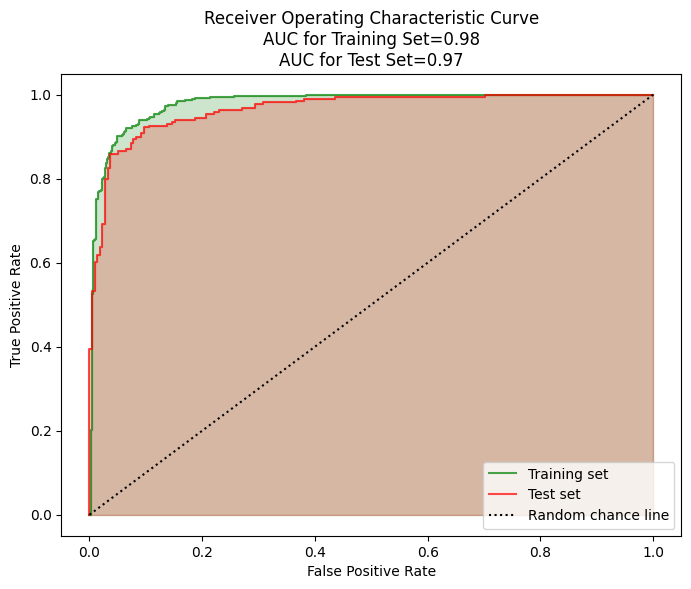

In [ ]:
ytrain_pred_proba = model1.predict_proba(Xtrain)[:, 1]
ytest_pred_proba  = model1.predict_proba(Xtest)[:, 1]

fpr_train, tpr_train, thresholds_train = roc_curve(ytrain, ytrain_pred_proba)
fpr_test,  tpr_test,  thresholds_test  = roc_curve(ytest, ytest_pred_proba)

plt.figure(figsize=(8, 6))
plt.step(fpr_train, tpr_train, color='g', alpha=0.7, where='post', label="Training set")
plt.fill_between(fpr_train, tpr_train, step='post', alpha=0.2, color='g')
plt.step(fpr_test,   tpr_test, color='r', alpha=0.7, where='post', label="Test set")
plt.fill_between(fpr_test,   tpr_test, step='post', alpha=0.2, color='r')
plt.plot([0, 1], [0, 1], c='k', linestyle=":", label="Random chance line")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve\nAUC for Training Set={:.2f}\nAUC for Test Set={:.2f}'.format(auc(fpr_train, tpr_train), auc(fpr_test, tpr_test)))
plt.legend()
plt.show()

### Q1.5 - <span style="color:red">[8]</span> - Fine-Tuning
The default threshold value in Sklearn Logistic Regression is 0.5. You are told by the stakeholders that the maximum false positive rate (FPR) which this project can tolerate is 0.2. Based on this information, choose the threshold value which leads to the highest Recall given $FPR \leq 0.2$. Use the training set to find this threshold value. What would be your new threshold?

In [ ]:
clf_df = pd.DataFrame({'fpr': fpr_train, 'tpr': tpr_train, 'threshold': thresholds_train}).sort_values("fpr")

new_threshold = clf_df[clf_df['fpr'] <= 0.2].sort_values("tpr",ascending=False)["threshold"].iloc[0]

print(f"My new threshold is {new_threshold}.")

My new threshold is 0.20618442126056274.


### Q1.6 - <span style="color:red">[6]</span> - Evaluation of Fine-Tuned Model: Accuracy Score
Report accuracy scores of the model based on the new threshold (*i.e.*, found in the previous question) for both the training and test sets.

In [ ]:
y_pred_new_threshold_train = (ytrain_pred_proba >= new_threshold).astype(int)
y_pred_new_threshold_test  = (ytest_pred_proba  >= new_threshold).astype(int)

accuracy_train = accuracy_score(ytrain, y_pred_new_threshold_train)
accuracy_test  = accuracy_score(ytest,  y_pred_new_threshold_test)

print(f"Model accuracy over training set is {np.round(accuracy_train,2)}.\nModel accuracy over test set is {np.round(accuracy_test,2)}.")

Model accuracy over training set is 0.9.
Model accuracy over test set is 0.84.


### Q1.7 - <span style="color:red">[8]</span> - Evaluation of Fine-Tuned Model: Confusion Matrix
Report the confusion matrix over the test set for both the default and new thresholds. Going from the default to new threshold, by what percentage the sum of false negatives and false positives changed? Did this sum decreased or increased?

Default threshold:


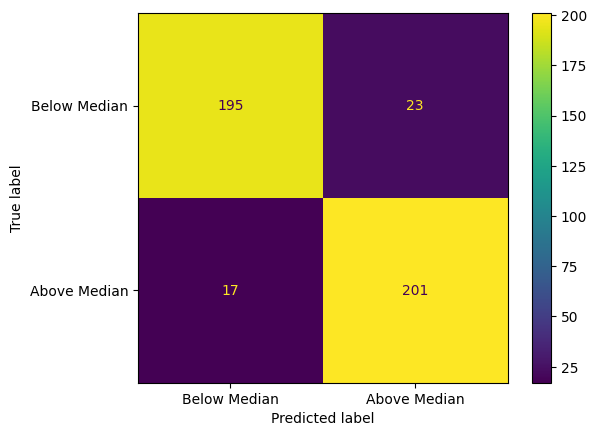

New threshold:


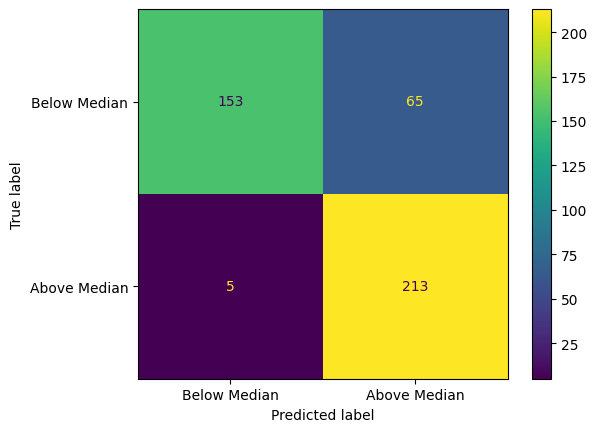

The sum of false negatives and false positives increased by 75.0%.


In [ ]:
print("Default threshold:")
ConfusionMatrixDisplay(confusion_matrix(ytest, model1.predict(Xtest)), display_labels = ['Below Median', 'Above Median']).plot()
plt.show(); plt.close()
print("New threshold:")
ConfusionMatrixDisplay(confusion_matrix(ytest, y_pred_new_threshold_test), display_labels = ['Below Median', 'Above Median']).plot()
plt.show(); plt.close()

tn_default_threshold, fp_default_threshold, fn_default_threshold, tp_default_threshold = confusion_matrix(ytest, model1.predict(Xtest)).ravel()
tn_new_threshold,     fp_new_threshold,     fn_new_threshold,     tp_new_threshold     = confusion_matrix(ytest, y_pred_new_threshold_test).ravel()

f_sum_default = fp_default_threshold + fn_default_threshold
f_sum_new     = fp_new_threshold     + fn_new_threshold

print(f"The sum of false negatives and false positives increased by {(f_sum_new-f_sum_default)*100/f_sum_default}%.")

---
## Question 2 - <span style="color:red">[30]</span> - Uncertainty Quantification
We have an apparatus which detects and records the amplitude of certain input signals. We have done repeated experiments with this device and have recorded the measured amplitudes of each input signal in "Data_Q2.csv", which has the following attributes:

|Column Index | Attribute | Description |
| --- | --- | --- |
| 0|Signal|Input physical signal|
| 1|Amplitude|Measured amplitude of input signal|

### Q2.1 - <span style="color:red">[20]</span> - Bootstrap
Using a confidence level of $97\%$, and a resampling number of $5000$, compute and report the **bootstrap** confidence interval (CI) of the **median** amplitude for each input signal.

Feel free to use `scipy.stats.bootstrap` to compute the bootstrap confidence intervals.

In [ ]:
def my_ci(signal, cl=0.97, num_boot=5000):
    from scipy.stats import bootstrap
    signal = (signal.values,)
    ci_l, ci_u = bootstrap(signal, np.median, confidence_level=cl, n_resamples=num_boot, random_state=seed).confidence_interval
    return np.median(signal), ci_l, ci_u

df2 = pd.read_csv("Data_Q2.csv")
columns_names =["Signal", "Median of amplitude", "CI_lower_bound", "CI_upper_bound"]
ci_data = np.zeros((len(df2["Signal"].unique()), len(columns_names)))
for i, signal in enumerate(df2["Signal"].unique()):
    median, ci_l, ci_u = my_ci(df2[ df2["Signal"] == signal ].Amplitude)
    ci_data[i,:] = i+1, median, ci_l, ci_u
ci_df = pd.DataFrame(ci_data, columns=columns_names)
display(ci_df)

,Signal,Median of amplitude,CI_lower_bound,CI_upper_bound
0,1.0,6.917837e-08,4.518544e-08,9.016641e-08
1,2.0,5.871542e-08,5.203683e-08,6.878633e-08
2,3.0,4.099045e-08,2.902647e-08,5.449680e-08
3,4.0,2.460381e-08,1.076514e-08,4.092409e-08
4,5.0,2.251332e-08,6.735790e-09,3.524115e-08


### Q2.2 - <span style="color:red">[10]</span> - CI Plot
Plot the median of amplitudes for each signal (*i.e.*, x-axis for signal and y-axis for the median of signal amplitude). Your plot must also show the bootstrap CIs' upper and lower bounds. Based on your calculated CIs, for which signal the apparatus is least certain?

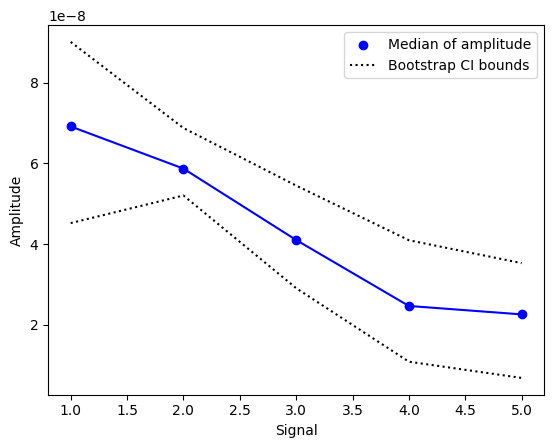

The apparatus is least certain for __Signal1__.


In [ ]:
plt.scatter(ci_df["Signal"], ci_df["Median of amplitude"], c="b", label="Median of amplitude")
plt.plot(ci_df["Signal"], ci_df["Median of amplitude"], c="b")
plt.plot(ci_df["Signal"], ci_df["CI_lower_bound"], ":k", label="Bootstrap CI bounds")
plt.plot(ci_df["Signal"], ci_df["CI_upper_bound"], ":k" )
plt.xlabel("Signal")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

ci_df["CI_width"] = ci_df["CI_upper_bound"] - ci_df["CI_lower_bound"]
print(f"The apparatus is least certain for __Signal{int(ci_df.iloc[ci_df.CI_width.argmax()].Signal)}__.")

---
$$ The\;End $$